<a href="https://colab.research.google.com/github/dradra0905/DataMiningWebNovel/blob/main/datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
filename = './data.txt'

file = open(filename, "r", encoding='utf-8')
data = file.readlines()
file.close()

cleaned_data = [item.replace('\n', '') for item in data]
cleaned_data = [item.replace(',', '') for item in cleaned_data]
cleaned_data = [item.replace('만', '000') if '.' in item else item.replace('만', '0000') for item in cleaned_data]
cleaned_data = [item.replace('억', '0000000') if '.' in item else item.replace('억', '00000000') for item in cleaned_data]
cleaned_data = [item.replace('0000능', '만능') for item in cleaned_data]
cleaned_data = [item.replace('000능', '만능') for item in cleaned_data]
cleaned_data = [item.replace('.', '') for item in cleaned_data]
cleaned_data = [item.replace('#', ',') for item in cleaned_data]
cleaned_data = [item.replace('--------', '\n') for item in cleaned_data]

# 리스트를 하나의 문자열로 결합
data_str = ''.join(cleaned_data)

# 결합된 문자열을 '\n'을 기준으로 나눔
data_list = [item.strip() for item in data_str.split('\n') if item.strip()]
processed_data = []

for item in data_list:
    if ',' in item:
        # 쉼표(,)가 있는 경우 쉼표를 기준으로 분할하여 리스트로 추가
        item_list = item.split(',')
        processed_data.append(item_list)
    else:
        # 쉼표(,)가 없는 경우 단일 항목 리스트로 추가
        processed_data.append([item])

new_data = []

for sublist in processed_data:
    if sublist:
        first_element = int(sublist[0])
        new_value = first_element // 100000

        for _ in range(1):
            # 원본 리스트의 첫 번째 요소를 10만으로 나눈 값을 추가하는 부분
            new_sublist = sublist.copy()
            new_data.append(new_sublist)


processed_data_filtered = [item[1:] for item in new_data if len(item) > 1]
# 단어 치환 함수
def replace_words(sentence, original_word, replacement_word):
    return [replacement_word if original_word in word else word for word in sentence]

# "0000남"을 "만남"으로 바꾸기
replaced_sentences = [replace_words(sentence, "0000남", "만남") for sentence in processed_data_filtered]
replaced_sentences = [replace_words(sentence, "000남", "만남") for sentence in replaced_sentences]
replaced_sentences = [replace_words(sentence, "00000000", "억") for sentence in replaced_sentences]

print(replaced_sentences)

[['로맨스판타지', '육아물', '빙의물', '인외존재', '다정남', '순정남', '직진남', '상처남', '대형견남', '직진녀', '다정녀', '엉뚱발랄녀', '친구>연인', '소꿉친구', '힐링물'], ['로맨스판타지', '육아물', '성장물', '환생물', '가족물', '무협물', '여주판타지', '첫사랑', '천재', '왕족/귀족', '카리스마남', '능력남', '능력녀', '외유내강', '걸크러쉬'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['로맨스판타지', '가상시대물', '드라마', '달달물', '힐링물', '암투물', '삼각관계', '능력녀', '무심녀', '철벽녀', '뇌섹녀', '능력남', '존댓말남', '피폐물', '역하렘'], ['미스테리', '빙의', '성좌', '방송', '시스템', '천재', '노력', '성장', '착각', '조력자', '고인물', '가수'], ['성장', '육아'], ['차원이동', '게임', '천재', '빙의', '망나니', '만능', '시스템'], ['전문직', '회귀', '시스템', '노력', '성장', '조력자', '매니저', '가수'], ['정통', '복수', '생존', '천재', '노력', '성장', '지존'], ['천재', '성장', '마법사', '하렘', '생존', '학원', '마왕', '먼치킨', '만능', '노력', '성직자', '네크로맨서'], ['아포칼립스', '격투가', '천재', '기갑', 'SF', '조력자'], ['마왕', '차원이동', '생존', '마계', '성장', '시스템'], ['정령', '정령술사', '정통', '복수', '생존', '회귀'], ['정통', '복수', '영웅/신화', '노력', '성장', '아티팩트', '살수'], ['환생', '복수', '깽판', '천재', '성장', '착각', '망나니', '검', '지존', '협객'], ['정통', '환생', '학원', '

In [9]:
element_counts = {}

# 데이터 처리
for sublist in replaced_sentences:
    for element in sublist:
        if element in element_counts:
            element_counts[element]["count"] += 1
            element_counts[element]["individual_count"] = len(sublist)
        else:
            element_counts[element] = {"count": 1, "individual_count": len(sublist)}

# 등장 횟수(count)를 기준으로 딕셔너리를 정렬
sorted_counts = sorted(element_counts.items(), key=lambda x: x[1]["count"], reverse=True)
scount=0
# 결과 출력
for element, counts in sorted_counts:
    count = counts["count"]
    scount+=1
    print(f"{element}: {count}, Count: {scount}")

성장: 61, Count: 1
천재: 55, Count: 2
로맨스판타지: 53, Count: 3
먼치킨: 48, Count: 4
회귀: 41, Count: 5
능력녀: 37, Count: 6
노력: 35, Count: 7
빙의물: 31, Count: 8
왕족/귀족: 29, Count: 9
다정남: 25, Count: 10
능력남: 25, Count: 11
시스템: 24, Count: 12
전문직: 24, Count: 13
생존: 24, Count: 14
정통: 23, Count: 15
빙의: 22, Count: 16
복수: 21, Count: 17
걸크러쉬: 19, Count: 18
환생: 18, Count: 19
전쟁: 18, Count: 20
순정남: 17, Count: 21
성장물: 16, Count: 22
집착남: 16, Count: 23
차원이동: 15, Count: 24
조력자: 15, Count: 25
고인물: 15, Count: 26
여주판타지: 14, Count: 27
재벌: 14, Count: 28
방송: 13, Count: 29
로맨틱코미디: 13, Count: 30
힐링물: 12, Count: 31
무심녀: 12, Count: 32
착각: 12, Count: 33
사이다녀: 12, Count: 34
대체역사: 12, Count: 35
경영/기업: 12, Count: 36
회귀물: 11, Count: 37
귀환: 11, Count: 38
이능력: 10, Count: 39
게임: 10, Count: 40
마법사: 10, Count: 41
육아물: 9, Count: 42
상처남: 9, Count: 43
검사: 9, Count: 44
존댓말남: 9, Count: 45
학원: 9, Count: 46
아포칼립스: 9, Count: 47
깽판: 9, Count: 48
능글남: 9, Count: 49
레이드: 9, Count: 50
오해물: 9, Count: 51
스포츠: 9, Count: 52
다정녀: 8, Count: 53
환생물: 8, Count

In [10]:
from itertools import combinations
import numpy as np
import csv

def jaccard_similarity(set1, set2):
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))
    return intersection_size / union_size if union_size != 0 else 0

# 데이터에서 유일한 단어 추출
unique_words = list(set(word for sublist in replaced_sentences for word in sublist))

# Jaccard 유사도 행렬 초기화
num_unique_words = len(unique_words)
jaccard_matrix = np.zeros((num_unique_words, num_unique_words))

# 모든 단어 쌍에 대한 Jaccard similarity 계산 및 행렬에 저장
for i, word1 in enumerate(unique_words):
    for j, word2 in enumerate(unique_words):
        if i < j:  # 행렬의 대각선 및 반대편은 계산할 필요 없음
            set1 = set(word for sublist in replaced_sentences if word1 in sublist for word in sublist)
            set2 = set(word for sublist in replaced_sentences if word2 in sublist for word in sublist)
            similarity = jaccard_similarity(set1, set2)

            jaccard_matrix[i, j] = similarity
            jaccard_matrix[j, i] = similarity  # 대칭성을 유지하기 위해 반대편도 채움

# 결과를 CSV 파일에 저장
csv_filename = "jaccard_similarity_matrix.csv"
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerows(jaccard_matrix)

print(f"Jaccard similarity matrix saved to '{csv_filename}'")

Jaccard similarity matrix saved to 'jaccard_similarity_matrix.csv'


In [16]:
from sklearn.cluster import KMeans
import numpy as np

# Jaccard Similarity 파일 읽어오기
similarities = np.loadtxt('jaccard_similarity_matrix.csv', delimiter=',')

# KMeans 클러스터링
k = 20 # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(similarities)

# 클러스터 결과 출력
labels = kmeans.labels_

# 클러스터별로 속한 단어들을 모아 출력
clusters = [[] for _ in range(k)]

# Assuming unique_words contains the original words
for word, cluster in zip(unique_words, labels):
    clusters[cluster].append(word)

# 출력
for i, words_in_cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {', '.join(words_in_cluster)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: 남장여자물
Cluster 2: 먼치킨, 차원이동, 천재
Cluster 3: 집착남, 빙의물, 능력녀, 로맨스판타지, 순정남, 왕족/귀족, 권선징악, 소유욕/독점욕, 로맨틱코미디, 걸크러쉬, 다정남, 힐링물, 성장물, 상처남, 사이다녀, 능력남, 여주판타지, 존댓말남
Cluster 4: 라이벌/앙숙, 무협물, 짝사랑, 후회남, 순진녀, 친구>연인, 개그물, 잔잔물, 악녀, 자상녀, 궁정로맨스, 타임슬립, 차원이동물
Cluster 5: 배우, 가수, 먹방/요리, 술법, 정치가, 재벌, 방송, 회사원, 메디컬, 학생, 경영/기업, 기타 스포츠, 법조인, 축구, 매니저, 살수, TS, 전문직, 책사, 미스테리, 군인, 스포츠, 작가
Cluster 6: 순정공, 평범수, 능력수, 미남공, 헌터물, 현대물, 판타지물
Cluster 7: 무공, 초능력, 마왕, 마검사, 레이드, 용사, 이능력, 영웅/신화, 마법사, 만능, 학원, 검사
Cluster 8: 환생물, 복수물, 대형견남, 직진남, 회귀물, 외유내강, 인외존재, 육아물, 치유물, 초월적존재, 계약관계, 첫사랑, 가족물, 소꿉친구, 계략녀, 연하남, 엉뚱발랄녀, 털털녀, 상처녀, 까칠남, 직진녀, 다정녀, 운명, 조신남, 짝사랑남, 재회물
Cluster 9: 사내연애, 신데렐라, 오피스물, 시월드
Cluster 10: 하렘, 격투가, 탑등반, 대장장이/생산직, 네크로맨서, 아포칼립스, 포식/흡수, 라이트노벨, 성직자
Cluster 11: 평범녀, 가족후회물, 해외로맨스, 남장여자, 신파, 쌍방삽질, 착각물, 레이드물, 미스터리, 냉정녀
Cluster 12: 조력자, 회귀, 귀환, 착각, 성장, 망나니, 전쟁, 깽판, 아티팩트, 정통, 빙의, 생존, 고인물, 환생, 게임, 복수, 시스템, 노력, 성좌
Cluster 13: 냉정남, 계략남, 뇌섹녀, 갑을관계, 가상시대물, 역하렘, 무심녀, 능글남, 철벽녀, 억, 도도녀, 신분차이, 카리스마남, 동양풍, 오해물, 영혼체인지
Cluster 14: 시한부

In [12]:
!pip install matplotlib

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

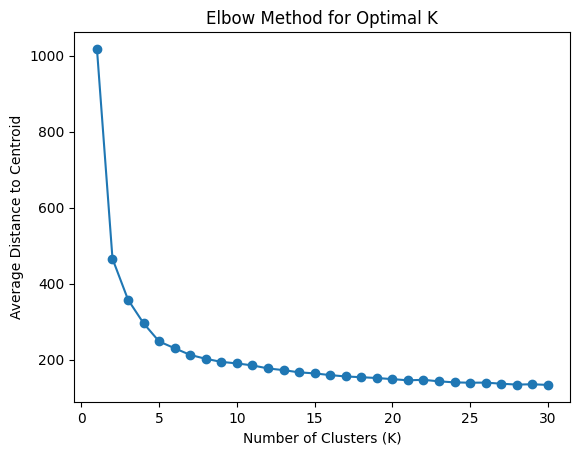

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Jaccard Similarity 파일 읽어오기
similarities = np.loadtxt('jaccard_similarity_matrix.csv', delimiter=',')

# 최적의 K를 찾기 위한 Elbow Method
max_k = 30  # 최대 클러스터 수
distortions = []

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(similarities)
    distortions.append(kmeans.inertia_)

# Elbow Method 그래프
plt.plot(range(1, max_k + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Distance to Centroid')
plt.show()